The first class Bandit generates rewards produced by arms. 
In this class $N$ is the number of times the arms will be pulled. $A$ is the number of arms. 

When class initialised for the first time it generates randomly the means of arms. The means are stored in the array means[]. The rewards for  arm $i$  are generated from the Normal distribution N(mean[i],1) in generate\_arms. 
next(i):  returns the next reward of arm $i$. 
curr_arm(i):  returns how many times arm $i$ has been pulled 
proportions: returns array with proportions of times arms have been pulled. 
An instance of this class stores generated rewards. 
Reset: clears all generated rewards. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

class Bandit:

    # N - number of time slots 
    # A - number of arms 

    def __init__(self, N, A): 
        self.N = N 
        self.A = A 
        self.curr = 0
        # generate means of normal random variables 
        self.means = self.generate_means(A)
        # generate N normal random variables with the above means and unit variance for each arm 
        self.arms = self.generate_arms(A, N)
        # number of rewards of arm i that have been returned so far 
        self.curr_position = np.zeros(A, dtype=int)
        self.rewards = np.zeros(self.N+2)
        # average - array of averages. 
        self.averages = np.zeros(self.A)    

    def generate_means(self, A):
        return np.random.uniform(0, 10, A)

    def generate_arms(self, A, N):
        arms = []  
        for i in range(A):
            # Generate an array of size N with normal random variables
            arm = np.random.normal(self.means[i], 1, N)
            arms.append(arm)
        return arms         
    
    def reset(self):
        self.curr_position = np.zeros(self.A, dtype=int)
        self.rewards = np.zeros(self.N+2)
        self.curr = 0

    def proportions(self): 
        return self.curr_position / self.N 
    
    def next(self, i):
        """
            This function takes i as a parameter and produces the next reward of arm i 
        """
        if self.curr_position[i] < self.N:
            reward = self.arms[i][self.curr_position[i]]
            self.curr_position[i] += 1
            self.curr += 1 
            self.rewards[self.curr] = self.rewards[self.curr-1] + reward
            self.averages[i] += (reward - self.averages[i]) / self.curr
    
    def curr_arm(self, i):
        return self.curr_position[i]

Class EpsilonGreedyPolicy 

is initiated by supplying the parameter epsilon of $\varepsilon-$greedy policy and an instance bandit of class Bandit.

run(): creates an episode of size $N$ applying the $\varepsilon-$greedy policy and producing  corresponding rewards, which are stores in bandit. Applying the policy it updates the averages of each arm. 

In [17]:
class EpsilonGreedyPolicy:

    def __init__(self, epsilon, bandit):
        """
            A - number of arms in the bandit problem
            epsilon - parameter of epsilon greedy policy
            bandit - an instance of class Bandit containing rewards 
        """    
        self.A = bandit.A
        self.epsilon = epsilon  
        self.bandit = bandit 
    
    def run(self):
        """
            applies the policy 
        """
        for n in range(1, self.bandit.N):
            u = np.random.uniform(0, 1)
            if u < self.epsilon or n < self.bandit.N / 10:  # always makes a random selection at the initial stage <N/10
                arm = np.random.randint(0, self.A)
            else:    
                max_value = np.max(self.bandit.averages)
                arm1 = np.where(self.bandit.averages == max_value)[0]
                arm = np.random.choice(arm1)  # Select randomly among best arms if tie
            self.bandit.next(arm)

The real means of underlying variables are 
[4.0492083  3.1261291  6.24646104 5.4090347  2.41334061 9.21345041
 3.31711365 5.27783793]
The highest mean is  9.21345041235228  at arm 5
Proportion of times each arm was pulled in the policy when epsilon = 0.05
[0.0184 0.0188 0.0181 0.0166 0.0171 0.8759 0.0182 0.0168]
Sample means of underlying variables are 
[2.71877689 2.97579166 2.24715882 3.15899269 2.01257184 8.61312021
 1.52842035 3.32727644]
Proportion of times each arm was pulled in the policy when epsilon = 0.1
[0.0254 0.021  0.0238 0.0256 0.023  0.8292 0.0243 0.0276]
Sample means of underlying variables are 
[3.43058769 3.08151751 3.9940302  5.23768366 2.3449057  9.19882356
 2.41177511 4.28856031]
Proportion of times each arm was pulled in the policy when epsilon = 0.2
[0.0321 0.0372 0.0351 0.0356 0.0319 0.7568 0.0354 0.0358]
Sample means of underlying variables are 
[4.56854608 3.01033355 5.13752508 5.23256495 2.3938672  9.22153988
 3.04381483 4.82987529]
Proportion of times each

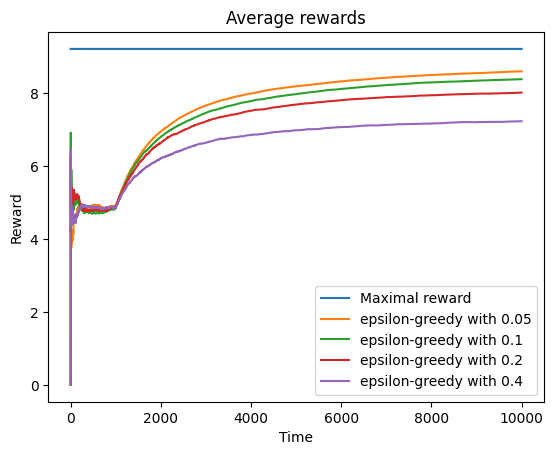

In [18]:
def main():
    N = 10000
    A = 8 
    
    bandit = Bandit(N, A)
    print("The real means of underlying variables are ")
    print(bandit.means)
    
    max_mean = np.max(bandit.means)
    print("The highest mean is ", max_mean , " at arm", np.where(bandit.means == max_mean)[0][0])
    plt.plot(max_mean * np.ones(N), label="Maximal reward")
    
    for epsilon in [0.05, 0.1, 0.2, 0.4]:
        epsilon_greedy_policy = EpsilonGreedyPolicy(epsilon, bandit)
        epsilon_greedy_policy.run()
        print("Proportion of times each arm was pulled in the policy when epsilon =", epsilon)
        print(bandit.proportions())
        average_reward = np.zeros(N)
        for l in range(1, N):
            average_reward[l] = bandit.rewards[l] / l 
        plt.plot(average_reward, label="epsilon-greedy with " + str(epsilon))
        print("Sample means of underlying variables are ")
        print(bandit.averages)
   
        bandit.reset()

    # Plot cumulative rewards
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.title('Average rewards')
    plt.legend()
    
    plt.show()

# Check if the script is being run directly by Python (not imported as a module)
if __name__ == "__main__":
    main()
